## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pour le prétraitement et le split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pour la partie deep learning
import tensorflow as tf

print("Librairies importées.")

Librairies importées.


**QUESTION:** Load dataset and display some lines of the csv file.

In [16]:
df = pd.read_csv('ai4i2020.csv')

#affichage d'un apererçu du dataset
print(df.head())
#affichage des statistisques du dataset
print(df.describe())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.


Répartition des classes (failures vs non-failures) :
Machine failure
0    9661
1     339
Name: count, dtype: int64


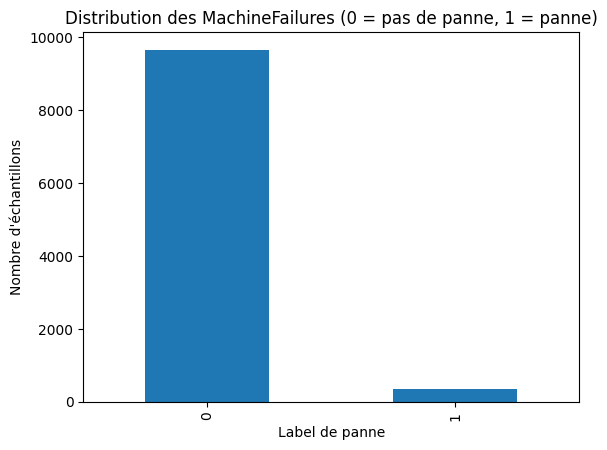

In [ ]:
failure_counts = df['Machine failure'].value_counts()
print("\nRépartition des classes (failures vs non-failures) :")
print(failure_counts)

# Bar chart
plt.figure()
failure_counts.plot(kind='bar')
plt.title("Distribution des MachineFailures (0 = pas de panne, 1 = panne)")
plt.xlabel("Label de panne")
plt.ylabel("Nombre d'échantillons")
plt.show()

**ANALYSIS QUESTION:** What do you observe?

On observe qu'il y a énormément de machines sans panne et qu'au contraire, il y très peu de cas labellisés avec panne. Cela indique que le jeu de données est fortement déséquilibré en faveur de la classe « pas de panne ».

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

Étant donné que la classe *« pas de panne »* est majoritaire, le modèle risque de favoriser la prédiction « pas de panne » pour la plupart des échantillons.

On peut s’attendre à ce que le modèle ait une accuracy globale trompeusement élevée (car il prédit souvent 0), tout en étant peu performant pour détecter les pannes réelles (c’est-à-dire une faiblesse sur la capacité à repérer la classe minoritaire).

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

Information sur les colonnes (noms et types) :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000

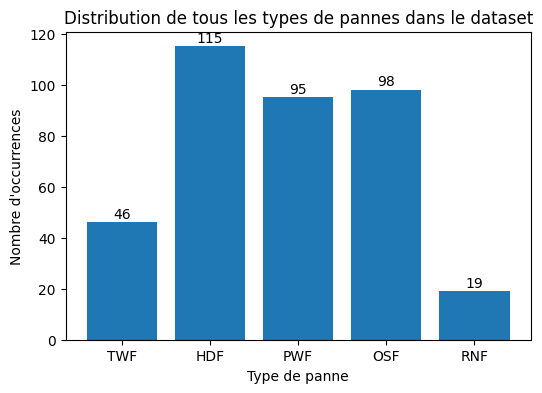

In [ ]:
# Affichage nom, type et nombre de valeurs non-nulles pour chaque colonne
print("Information sur les colonnes (noms et types) :")
df.info()

#Afficher la distribution des TWF, HDF, PWF, OSF, RNF dans tout le dataset
failure_cols = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# On suppose que dans votre dataset, ces colonnes sont binaires (0 ou 1)
# On fait simplement la somme pour connaître le nombre d'occurrences de chaque type de panne
all_failure_counts = df[failure_cols].sum()

print("\nDistribution des différents types de pannes (TWF, HDF, PWF, OSF, RNF) :")
print(all_failure_counts)

# Affichage du bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(all_failure_counts.index, all_failure_counts.values)
plt.title("Distribution de tous les types de pannes dans le dataset")
plt.xlabel("Type de panne")
plt.ylabel("Nombre d'occurrences")

# Ajouter le nombre exact au-dessus de chaque barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()


**ANALYSIS QUESTION:** What do you observe?

On remarque que les pannes de type RNF sont nettement moins présentes dans le dataset, ce qui risque d'entrainer par la suite une sous représentation de ces dernières et donc un mauvais apprentissage pour les détecter.

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."


Distribution des types de pannes parmi les machines en panne uniquement :
TWF                     46
HDF                    115
PWF                     95
OSF                     98
RNF                     19
No Specific Failure      9
dtype: int64


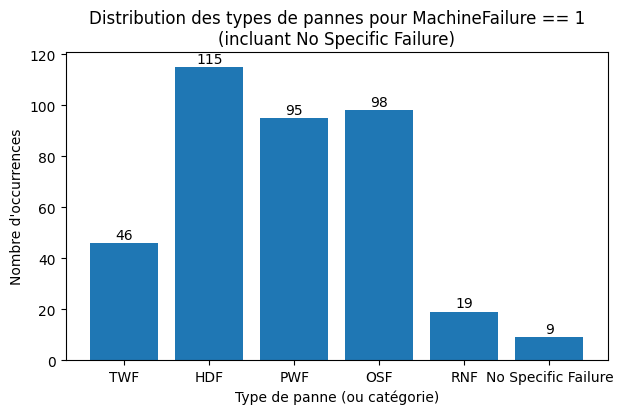

In [ ]:
# Filtrer uniquement les lignes où Machine failure == 1
df_failure_only = df[df['Machine failure'] == 1]

# Calculer le nombre de machines en panne sans aucun type de panne spécifique (TWF=HDF=PWF=OSF=RNF=0)
no_specific_failure = (df_failure_only[failure_cols].sum(axis=1) == 0).sum()

# Copier les erreurs et ajouter une colonne pour No Specific Failure
failure_counts_extended = all_failure_counts.copy()
failure_counts_extended['No Specific Failure'] = no_specific_failure

print("\nDistribution des types de pannes parmi les machines en panne uniquement :")
print(failure_counts_extended)

# Bar chart
plt.figure(figsize=(7,4))
bars2 = plt.bar(failure_counts_extended.index, failure_counts_extended.values)
plt.title("Distribution des types de pannes pour MachineFailure == 1\n(incluant No Specific Failure)")
plt.xlabel("Type de panne (ou catégorie)")
plt.ylabel("Nombre d'occurrences")

# Ajouter les valeurs sur chaque barre
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f"{int(height)}", ha='center', va='bottom')

plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

Grâce à la colonne No Specific Failure, on remarque bien la présence de pannes qui n'entrent pas dans les autres catégories de pannes. \\
\
On en conclue que le dataset a peut être besoin que relabelise ces données pour ajouter des types d'erreurs qui correspondent à ces problèmes non classifiés. On en conclue également qu'on ne peut pas avoir toutes les erreurs en se basant uniquement sur les effectifs des différentes catégories d'erreur, car on ne pourrair pas identifier les erreurs des No specific failure. Ainsi, il est impératif de prendre en compte la colonne Machine failure de manière à pouvoir être sur qu'une machine est en panne.

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [ ]:
print("Noms des colonnes et leurs types respectifs :")
print(df.dtypes)

Noms des colonnes et leurs types respectifs :
UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

- En entrée du model nous choisirons les caractéristisques physiques chiffrables de chaque machine de manière à faciliter les conversions et notre apprentissage : \\
 **[
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']** \\

- En sortie du model nous choisirons les labels des differents type de pannes, sauf RNF, ainsi que Machine failure, car comme nous l'avons expliquer précédemment nous ne pouvons pas savoir exactement quels machines sont en pannes sans la colonne Machine failure. \\
Nous décidons également d'exclure RNF des sorties car les erreurs de cette catégories sont présentes bien trop faible nombre dans le dataset, ce qui risque de poser des problèmes de classification au niveau de cette erreur. : \\
 **['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']**

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [ ]:
X = df[[
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']]
y = df[['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']]

# Séparation du dataset en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
#On note ici, qu'au vu du dataset set très petit en ce qu'il s'agit des erreurs, on utilise le dataset de test comme dataset de validation
#Ainsi, on ne split pas 2 fois le dataset initial pour ne pas réduire encore d'avantage le nombre de pannes présent dans chaque dataset


# Afficher le nombre d'éléments dans chaque ensemble
print(f"Nombre d'éléments dans X_train : {len(X_train)}")
print(f"Nombre d'éléments dans y_train : {len(y_train)}")
print(f"Nombre d'éléments dans X_test  : {len(X_test)}")
print(f"Nombre d'éléments dans y_test  : {len(y_test)}")




Nombre d'éléments dans X_train : 8000
Nombre d'éléments dans y_train : 8000
Nombre d'éléments dans X_test  : 2000
Nombre d'éléments dans y_test  : 2000


**QUESTION** Code below the model architecture

In [ ]:
# (1) DEFINE THE ARCHITECTURE OF MY MODEL
#first, I define all the layers and the way they are connected
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(32, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(5, activation='sigmoid')(x)

my_mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_mlp_model")
my_mlp_model.summary()


# (2) DEFINE THE TRAINING HYPER-PARAMETERS WITH THE "COMPILE" METHOD:
'''
(1) Set the "optimizer" [pick 'adam', 'sgd' or 'rmsprop']
(2) Set the loss [cf. lesson #3, we pick the categorical cross-entropy]
(3) Set the final performance metric to evaluate the model
'''

my_mlp_model.compile(optimizer='adam',
                     loss='binary_crossentropy',  # Car multi-label
                     metrics=['binary_accuracy'])  # Ou 'accuracy' si tu veux rester dessus

Model: "my_mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)          │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_160 (Dense)                    │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_117              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_117 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_161 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_118              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_118 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_162 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_119              │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_119 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_163 (Dense)                    │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,165 (47.52 KB)

 Trainable params: 11,717 (45.77 KB)

 Non-trainable params: 448 (1.75 KB)

**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

In [ ]:
# (3) NOW, LET'S TRAIN ON MY DATA WITH THE "FIT" METHOD
'''
(1) Set the number of epochs
(2) Set the size of the (mini)batch
(3) Set the training dataset ==> here, X_train with Y_train
(4) Set the validation dataset (X_val, Y_val)
'''

# Early stopping ajusté
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Entraînement du modèle avec le scheduler personnalisé
nb_epochs = 50
batch_size = 256
training_history = my_mlp_model.fit(
    X_train, y_train,  # Utilisation des données avec bruit
    validation_data=(X_test, y_test),
    epochs=nb_epochs,
    batch_size=batch_size,
    #callbacks= early_stopping  # Ajouter le scheduler personnalisé
)


#COMPUTE THE ACCURACY ON THE TRAINING AND TEST SETS
loss_train, acc_train = my_mlp_model.evaluate(X_train, y_train, batch_size=batch_size)
loss_test, acc_test = my_mlp_model.evaluate(X_test, y_test, batch_size=batch_size)

print("Performance on the TRAIN set, ACCURACY=",acc_train)
print("Performance on the TEST set, ACCURACY=",acc_test)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - binary_accuracy: 0.5114 - loss: 1.3080 - val_binary_accuracy: 0.6035 - val_loss: 3.1768
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.5549 - loss: 1.1237 - val_binary_accuracy: 0.6277 - val_loss: 1.2089
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.6321 - loss: 0.9828 - val_binary_accuracy: 0.7976 - val_loss: 0.6870
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.7087 - loss: 0.8676 - val_binary_accuracy: 0.9758 - val_loss: 0.6201
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.8010 - loss: 0.7600 - val_binary_accuracy: 0.9857 - val_loss: 0.5918
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.8839 - loss: 0.6525 - val_binary_accuracy: 0.9688 - val_loss: 0.5777
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.9364 - loss: 0.5491 - val_binary_accuracy: 0.9872 - val_loss: 0.4440
Epoch 8/50
32/32 

In [ ]:
def display_training_curves(training_history):
  # display loss
  plt.plot(training_history.history['loss'],label='loss')
  plt.plot(training_history.history['val_loss'], label='val_loss')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()
  #display accuracy
  plt.plot(training_history.history['binary_accuracy'],label='acc')
  plt.plot(training_history.history['val_binary_accuracy'], label='val_acc')
  plt.xlabel("epoch")
  plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
  plt.show()

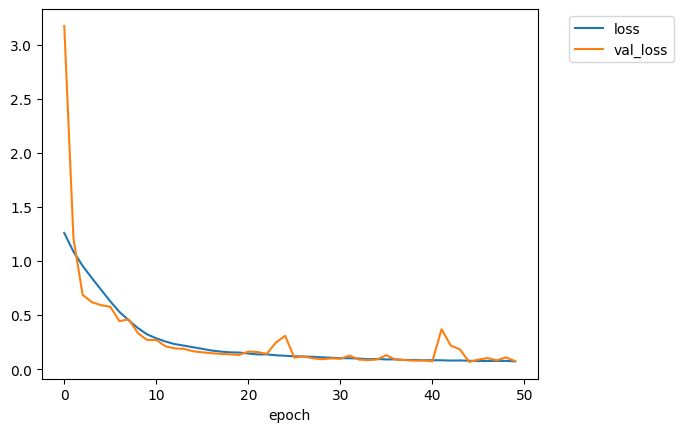

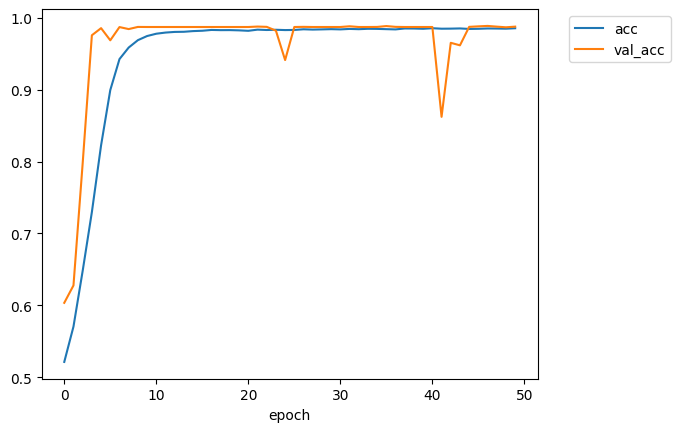

In [ ]:
display_training_curves(training_history )

Le modèle n'overfit pas et a même une excellente accuraccy et loss.

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





63/63 [==============================] - 0s 3ms/step
Classification Report:
                 precision    recall  f1-score   support

Machine failure       0.00      0.00      0.00      1939
            TWF       0.00      0.00      0.00        11
            HDF       0.00      0.00      0.00        17
            PWF       0.01      1.00      0.02        20
            OSF       0.00      0.00      0.00        18

      micro avg       0.01      0.01      0.01      2005
      macro avg       0.00      0.20      0.00      2005
   weighted avg       0.00      0.01      0.00      2005
    samples avg       0.01      0.01      0.01      2005



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


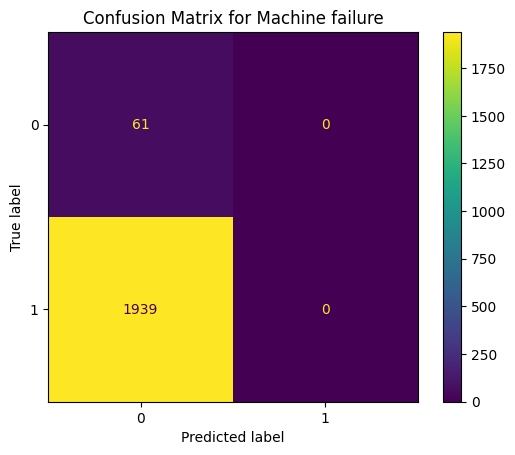

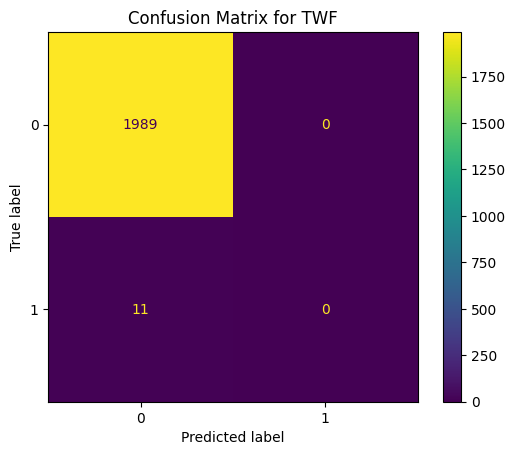

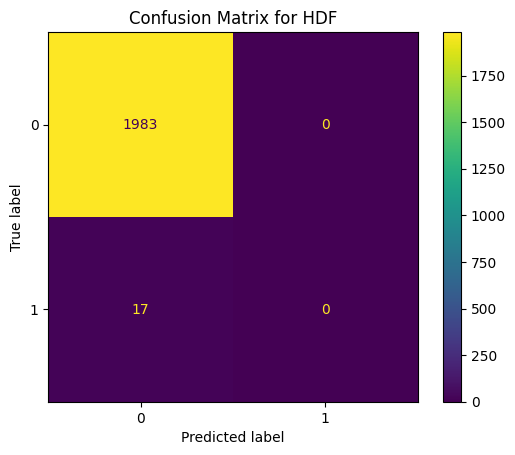

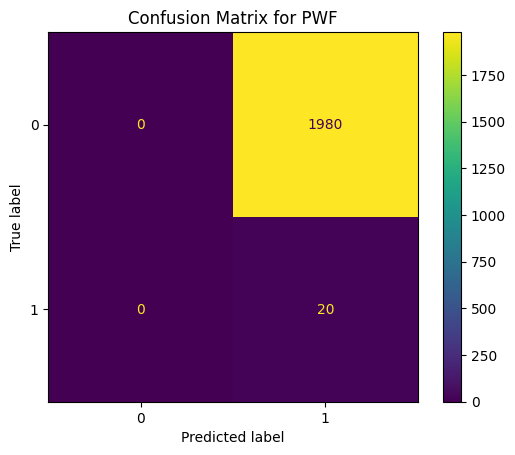

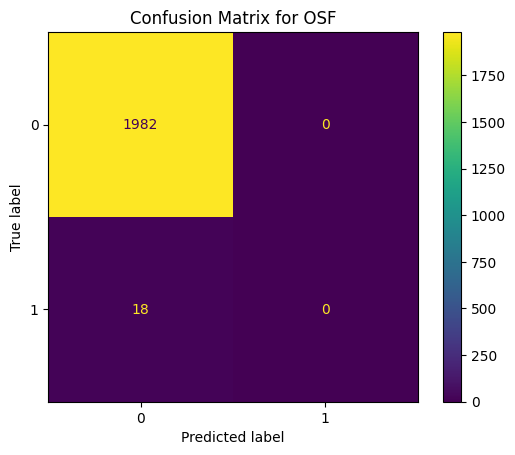

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prédictions du modèle
y_pred_proba = my_mlp_model.predict(X_test).astype(int)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Noms des classes
class_names = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF']

# Rapport de classification
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

#Le problème étant multilabelisé nous tracons une matrice de confusion pour chaque label
# Matrices de confusion pour chaque label
for idx, label in enumerate(class_names):
    cm = confusion_matrix(y_test[:, idx], y_pred[:, idx])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {label}")
    plt.show()


**ANALYSIS QUESTION** What do you observe? What can you conclude?

On observe qu'aucune panne n'est jamais prédite car il n'y a pas assez de données avec des erreurs machines donc il estime qu'il n'y a jamais de panne, il faut donc faire de l'undersampling pour supprimer des données sans pannes qui se ressemblent et de l'oversampling pour ajouter des données avec erreur de manière artificielle de manière à équilibrer le dataset. \\

On conclue également que malgrè des bonnes valeurs d'accuraccy et de loss, cela ne suffit pas pour valider un modèle et un dataset.

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


In [ ]:
!pip install tensorflow===2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 780.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.0 MB/s eta 0:00:00
  A

In [7]:
#On importe les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [17]:
# On crée une colonne Machine working qui est l'inverse de Machine Failure de manière à résoudre les problèmes multilabels
df.rename(columns={'Machine failure': 'Machine working'}, inplace=True)
df['Machine working'] = (df['Machine working'] == 0).astype(int)

# Créer la colonne 'failure_count' pour compter les pannes
df['failure_count'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)

# On diviser le dataset en ensembles train et test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# On sépare les ensembles d'entraînement pour retirer les lignes multilabélisées
A_train = train_df[train_df['failure_count'] <= 1]  # Un seul type de panne
B_train = train_df[train_df['failure_count'] > 1]   # Plus d'un type de panne

# On défini les colonnes pour X et Y pour train et test
X_train = A_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_train = A_train[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label

X_test = test_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_test = test_df[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label


y_train_labels = np.argmax(y_train, axis=1)  # Pour SMOTE, on utilise la classe majoritaire
class_counts = Counter(y_train_labels)

# Vérifier la répartition des classes avant rééquilibrage du datset
print("Répartition des classes originale:", Counter(np.argmax(y_train, axis=1)))

# Définition d'une stratégie de sous-échantillonnage pour équilibrer les classes
minority_class = min(class_counts, key=class_counts.get)
target_count = class_counts[minority_class]  # Nombre d'échantillons de la classe minoritaire

# Trouver la classe majoritaire
majority_class = max(class_counts, key=class_counts.get)

# Définir un multiplicateur pour la classe majoritaire pour que soit présent dans le dataset ce
majority_multiplier = 200  # on peut ajuster ce multiplicateur
majority_target_count = min(target_count * majority_multiplier, class_counts[majority_class])

# Définir la stratégie de sous-échantillonnage
sampling_strategy = {cls: (majority_target_count if cls == majority_class else count)
                     for cls, count in class_counts.items()}

# Sous-échantillonnage de toutes les classes
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = under_sampler.fit_resample(X_train, np.argmax(y_train, axis=1))

# Affichage de la répartition des classes après sous-échantillonnage
print("Répartition des classes après sous-échantillonnage :", Counter(y_train_res))

# Identification de la classe la plus minoritaire
most_minority_class = min(class_counts, key=class_counts.get)

# Définir une stratégie de suréchantillonnage pour SMOTE
# Augmenter considérablement la classe la plus minoritaire
smote_strategy = {
    #cls: min(int(count * 50), class_counts[majority_class]) if cls == most_minority_class else #ajouter en particulier pour la classe la plus minoritaire
    cls: min(int(count * 20), class_counts[majority_class])
    for cls, count in class_counts.items() if cls != majority_class
}

# Application de SMOTE avec la stratégie personnalisée
smote = SMOTE(sampling_strategy=smote_strategy, random_state=42)
X_res, y_res_indices = smote.fit_resample(X_train_res, y_train_res)

# Convertir y_res en encodage binaire après SMOTE
y_res_multi = to_categorical(y_res_indices, num_classes=5)

print("\n Répartition des labels après SMOTE :")
unique, counts = np.unique(np.argmax(y_res_multi, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

# ----------------------------------------------------------------
# ÉTAPE 5 : Concaténation de B_train après SMOTE
# ----------------------------------------------------------------

X_B_train = B_train[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y_B_train = B_train[['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']].values  # Encodage binaire pour multi-label

# Concaténation des données
X_train_final = np.concatenate([X_res, X_B_train], axis=0)
y_train_final = np.concatenate([y_res_multi, y_B_train], axis=0)

X_test_final = X_test
y_test_final = y_test

# ----------------------------------------------------------------
# ÉTAPE 6 : Reconversion en DataFrames après concaténation
# ----------------------------------------------------------------

# Convertir X_train_final et X_test_final en DataFrames
X_train_final_df = pd.DataFrame(X_train_final, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
X_test_final_df = pd.DataFrame(X_test_final, columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

# Convertir y_train_final et y_test_final en DataFrames
y_train_final_df = pd.DataFrame(y_train_final, columns=['Machine working', 'TWF', 'HDF', 'PWF', 'OSF'])
y_test_final_df = pd.DataFrame(y_test_final, columns=['Machine working', 'TWF', 'HDF', 'PWF', 'OSF'])

# Normalisation des données
scaler = StandardScaler()

# Appliquer la normalisation sur les données d'entraînement
X_train_final_df = scaler.fit_transform(X_train_final_df)

# Appliquer la même normalisation sur les données de test
X_test_final_df = scaler.transform(X_test_final_df)


# Calcul des class_weights
y_train_integers = np.argmax(y_train_final, axis=1)
classes = np.unique(y_train_integers)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_integers)
class_weight_dict = {i: weight for i, weight in zip(classes, class_weights)}

Répartition des classes originale: Counter({np.int64(0): 7729, np.int64(2): 91, np.int64(3): 66, np.int64(4): 65, np.int64(1): 33})
Répartition des classes après sous-échantillonnage : Counter({np.int64(0): 6600, np.int64(2): 91, np.int64(3): 66, np.int64(4): 65, np.int64(1): 33})

 Répartition des labels après SMOTE :
{np.int64(0): np.int64(6600), np.int64(1): np.int64(660), np.int64(2): np.int64(1820), np.int64(3): np.int64(1320), np.int64(4): np.int64(1300)}


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

Nous souhaitons mettre en place un rééquillibrage du dataset en appliquant de l'undersampling et de l'oversampling au dataset. \\

**OVERSAMPLING**: \\
Nous décidons d'appliquer la méthode de SMOTE pour oversampler car il s'agit d'une des méthodes les plus efficaces pour ajouter artificiellement de la donnée. Cependant cette méthode ne peut pas être appliqué aux problèmes multilabelisé. Ainsi, nous devons trier les lignes multilabelisées. \\
Pour cela, nous décidons tout d'abord de remplacer la colonne Machine failure par son inverse que nous nommons Machine working. Nous décidons également de retirer du dataset les lignes pour lesquelles il y a plusieurs types d'erreurs spécifiques. \\
Pour notre stratégie d'oversempling nous décidons de multiplier par 20 le nombres d'éléments correspondant aux classes minoriatires, c'est à dire toutes les classes sauf Machine working. Nous faisons ce choix car Machine working est environ 100 fois plus présent dans le dataset que les autres classes.  \\

**UNDERSAMPLING**: \\
Comme nous venons de l'évoquer, Machine working est beaucoup plus présente que les autres classes dans le dataset. Pour éviter d'ajouter trop données artificiellement, nous appliquons également de l'undersampling sur la classe Machine working en retirant certaines lignes correspondantes à cette classe du dataset. \\
Pour cela nous choisissons à ne laisser de lignes Machine working dans le dataset que 200 fois le nombre d'élément dans la classe la plus minoritaire, ici TWF.  \\

Les multiplicateur pour les stratégies d'oversampling et d'undersampling ont étés choisi de manière à obtenir la meilleures précision pour les différentes classes. Il faut également noter que nous n'avons pas abusé de l'undersampling et de l'oversampling car la création de données de manière artificielle n'est pas toujours exacte et peut entrainer un dataset faussé.Ainsi, nous mettons également en place un class weighting. \\

**CLASS WEIGHT**: \\
La méthode class weigh permet de gérer le déséquilibre des classes dans un problème de classification. Cela attribue un poids plus élevé aux classes sous représentées pour éviter que le modèle favorise les classes sur représentées, dans notre cas Machine working.



**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

In [18]:

# Définition de l'architecture du modèle MLP
inputs = tf.keras.Input(shape=(X_train_final.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(64, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(32, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0001, l2=0.002))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(5, activation='sigmoid')(x)

my_mlp_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="my_mlp_model")
my_mlp_model.summary()
# Définition de l'optimiseur avec un learning rate initial
optimizer = tf.keras.optimizers.Adam(learning_rate=0.08)

# Compilation du modèle
my_mlp_model.compile(optimizer=optimizer,
                     loss='binary_crossentropy',
                     metrics=['binary_accuracy'])

Model: "my_mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,165 (47.52 KB)

 Trainable params: 11,717 (45.77 KB)

 Non-trainable params: 448 (1.75 KB)

**QUESTION** Code below the algorithms allowing to train model


In [19]:
#Afin d'améliore l accuracy pour chaque type de panne on met en place un learning rate qui diminue en fonction du nombre d'epoch
def custom_learning_rate_scheduler(epoch, initial_lr=0.08, decay_rate=0.1):
    return initial_lr * (1 / (1 + decay_rate * epoch))

# Créer un callback pour le scheduler personnalisé
lr_scheduler_custom = LearningRateScheduler(custom_learning_rate_scheduler)

# Early stopping pour eviter l'overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, restore_best_weights=True
)

# Entraînement du modèle avec le scheduler personnalisé
nb_epochs = 50
batch_size = 256

training_history = my_mlp_model.fit(
    X_train_final_df, y_train_final_df,
    validation_data=(X_test_final_df, y_test_final_df),
    class_weight=class_weight_dict,
    epochs=nb_epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, lr_scheduler_custom]  # Ajouter le scheduler personnalisé
)

# Évaluation du modèle
loss_train, acc_train = my_mlp_model.evaluate(X_train_final_df, y_train_final_df, batch_size=batch_size)
loss_test, acc_test = my_mlp_model.evaluate(X_test_final_df, y_test_final_df, batch_size=batch_size)

print("Performance sur le TRAIN set, ACCURACY =", acc_train)
print("Performance sur le TEST set, ACCURACY =", acc_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - binary_accuracy: 0.7725 - loss: 1.1178 - val_binary_accuracy: 0.9143 - val_loss: 0.5395 - learning_rate: 0.0800
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - binary_accuracy: 0.9092 - loss: 0.4981 - val_binary_accuracy: 0.9873 - val_loss: 0.3329 - learning_rate: 0.0727
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9142 - loss: 0.4357 - val_binary_accuracy: 0.9704 - val_loss: 0.3146 - learning_rate: 0.0606
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.9240 - loss: 0.3778 - val_binary_accuracy: 0.9748 - val_loss: 0.2911 - learning_rate: 0.0466
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.9284 - loss: 0.3318 - val_binary_accuracy: 0.9689 - val_loss: 0.2494 - learning_rate: 0.0333
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.9316 - loss: 0.2796 - val_binary_accuracy: 0.9747 - val_loss: 0.2033 - learning_rate: 0.0222
Epoch 7/50
46

Pour améliorer, la précision de prédiction pour chaque classe nous mettons en place un learning rate qui diminue lorsque le nombre d'epoch augmente car ce la permet de faire de gros ajustements au début et puis d'affiner les poids progressivement en s'approchant du minimum global par la suite. Car si le learning rate est trop grand on apprend trop vite et on risque de ne pas converger, et si il est trop petit on apprend trop lentement et on peut stagner dans un minimum local.

**QUESTION** Plot the confusion matrix and the classification report

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Shape de y_test_final_df : (2000, 5)
Shape de y_pred : (2000, 5)
Valeurs uniques de y_test_final_df après correction : [0 1]
Valeurs uniques de y_pred : [0 1]
Classification Report:
                 precision    recall  f1-score   support

Machine working       1.00      0.93      0.96      1939
            TWF       0.10      0.27      0.15        11
            HDF       1.00      0.18      0.30        17
            PWF       0.93      0.70      0.80        20
            OSF       0.88      0.39      0.54        18

      micro avg       0.98      0.91      0.95      2005
      macro avg       0.78      0.49      0.55      2005
   weighted avg       0.99      0.91      0.95      2005
    samples avg       0.91      0.91      0.91      2005



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


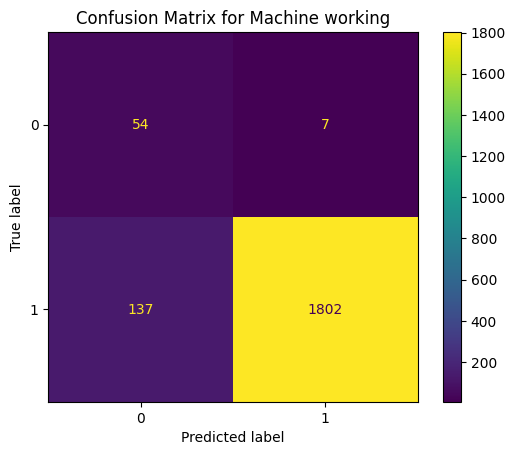

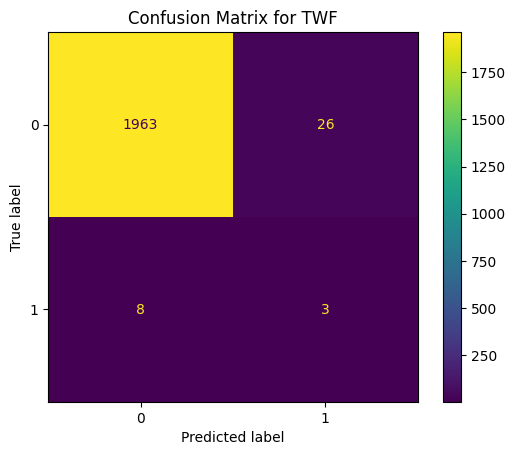

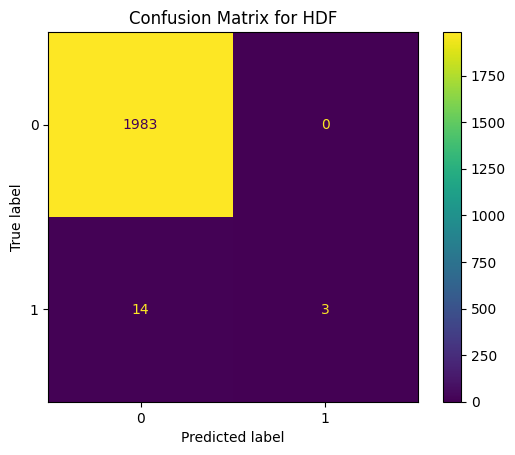

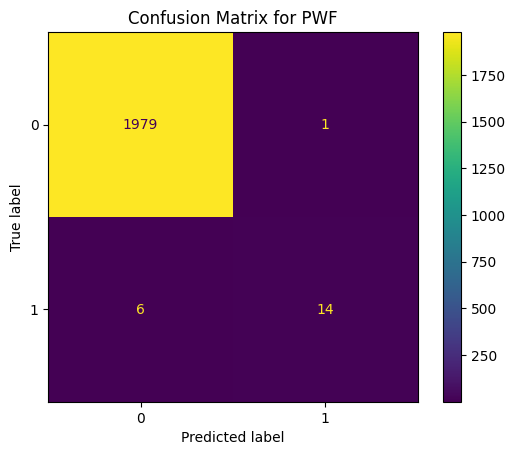

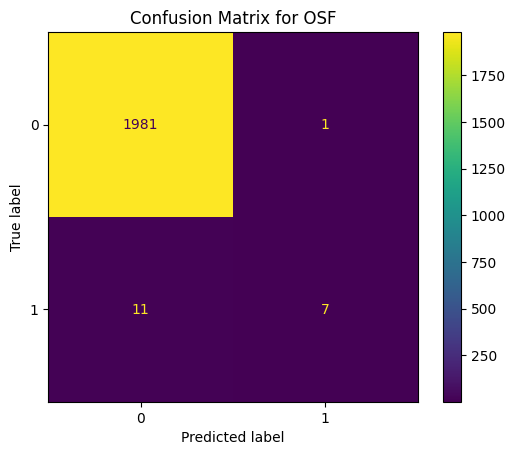

In [20]:
# ----------------------------------------------------------------
# ÉTAPE 9 : Évaluation du modèle
# ----------------------------------------------------------------

# Prédictions du modèle (obtenues en probabilités)
y_pred_proba = my_mlp_model.predict(X_test_final_df)

# Convertir les probabilités en classes binaires (0 ou 1) avec un seuil de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Convertir y_test_final_df en numpy array si c'est un DataFrame
if isinstance(y_test_final_df, pd.DataFrame):
    y_test_final_df = y_test_final_df.to_numpy()

# Vérifier que y_pred est bien un numpy array
if isinstance(y_pred, pd.DataFrame):
    y_pred = y_pred.to_numpy()

# Vérifier les dimensions et les valeurs après correction
print(f"Shape de y_test_final_df : {y_test_final_df.shape}")
print(f"Shape de y_pred : {y_pred.shape}")
print(f"Valeurs uniques de y_test_final_df après correction : {np.unique(y_test_final_df)}")
print(f"Valeurs uniques de y_pred : {np.unique(y_pred)}")

class_names = ['Machine working', 'TWF', 'HDF', 'PWF', 'OSF']
# Rapport de classification
print("Classification Report:")
print(classification_report(y_test_final_df, y_pred, target_names=class_names))

# Matrices de confusion pour chaque label
for idx, label in enumerate(class_names):
    cm = confusion_matrix(y_test_final_df[:, idx], y_pred[:, idx])  # Ici plus d'erreur
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix for {label}")
    plt.show()

**ANALYSIS QUESTION** What do you observe? What can you conclude?

D'après le classification report, la précision de prédiction pour toutes les classes a beaucoup augmenté grâce au rééquilibrage du dataset que nous avons effectué. Sauf en ce qu'il s'agit du type d'erreur TWF en raison de sa présence en trop faible quantité dans le dataset d'origine, malgrè le SMOTE et le class weight. Ainsi, il y a très peu de faux positifs pour les autres types d'erreur. \\
Le recall quant à lui est élevé pour les classes Machine working, OSF et PWF ce qui signifie que pour ces classes il y a peu de faux négatifs, ce qui n'est pas le cas pour les classes TWF et HDF. \\
Nous venons à la conclusion qu'il faudrait encore davantage équilibre le dataset en ajoutant des données de manière artificielle pour TWF et HDF. Cependant nous avons essayer d'ajouter en particulier plus de données pour la classe la plus minoritaire (TWF) et cela n'a pas été concluant, car les données artificielles ajoutées ne sont pas toujours cohérentes avec le reste du dataset ce qui mène fausse par la suite l'apprentissage du modèle.


In [ ]:
# Télécharger les modèles

# Convertir le modèle en format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(my_mlp_model)
tflite_model = converter.convert()

# Sauvegarder le modèle TFLite dans un fichier
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

# Conversion des arrays en float32 avant sauvegarde
X_test_scaled_float32 = X_test_final_df.astype(np.float32)
Y_test_float32 = y_test_final_df.astype(np.float32)

# Sauvegarde des arrays convertis
np.save("X_test_ai4i.npy", X_test_scaled_float32)
np.save("Y_test_ai4i.npy", Y_test_float32)